In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
def load_tsv_files(base_path):
    """טוען את כל קבצי ה-TSV מתוך תיקיות שמכילות 'eeg' בשם."""
    dataframes = []
    
    for dirpath, dirnames, filenames in os.walk(base_path):
        if 'eeg' in dirpath.lower():  # נזהר במקרה של אותיות גדולות/קטנות
            for file in filenames:
                if file.endswith(".tsv"):
                    file_path = os.path.join(dirpath, file)
                    try:
                        df = pd.read_csv(file_path, sep='\t')
                        dataframes.append(df)
                        print(f"הקובץ נטען בהצלחה: {file_path}")
                    except Exception as e:
                        print(f"שגיאה בטעינת {file_path}: {e}")

    if not dataframes:
        print("לא נמצאו קבצי .tsv לטעינה.")

    return dataframes

def merge_dataframes(dataframes):
    """מאחד את כל הדאטהפריימים לדאטהפריים אחד."""
    if not dataframes:
        print("אין דאטהפריימים לאיחוד.")
        return None
    
    try:
        merged_df = pd.concat(dataframes, ignore_index=True)
        print("הקבצים אוחדו בהצלחה.")
        print(f"שורות: {merged_df.shape[0]}, עמודות: {merged_df.shape[1]}")
        return merged_df
    except Exception as e:
        print(f"שגיאה באיחוד הקבצים: {e}")
        return None

# דוגמה לשימוש:
base_path = r'C:\Users\jacky\Desktop\תיקיה לbrainstorm\DATAVAWES'
dataframes_list = load_tsv_files(base_path)
merged_df = merge_dataframes(dataframes_list)


הקובץ נטען בהצלחה: C:\Users\jacky\Desktop\תיקיה לbrainstorm\DATAVAWES\sub-1\eeg\sub-1_task-Sleep_acq-headband_channels.tsv
הקובץ נטען בהצלחה: C:\Users\jacky\Desktop\תיקיה לbrainstorm\DATAVAWES\sub-1\eeg\sub-1_task-Sleep_acq-headband_events.tsv
הקובץ נטען בהצלחה: C:\Users\jacky\Desktop\תיקיה לbrainstorm\DATAVAWES\sub-1\eeg\sub-1_task-Sleep_acq-psg_channels.tsv
הקובץ נטען בהצלחה: C:\Users\jacky\Desktop\תיקיה לbrainstorm\DATAVAWES\sub-1\eeg\sub-1_task-Sleep_acq-psg_events.tsv
הקובץ נטען בהצלחה: C:\Users\jacky\Desktop\תיקיה לbrainstorm\DATAVAWES\sub-10\eeg\sub-10_task-Sleep_acq-headband_channels.tsv
הקובץ נטען בהצלחה: C:\Users\jacky\Desktop\תיקיה לbrainstorm\DATAVAWES\sub-10\eeg\sub-10_task-Sleep_acq-headband_events.tsv
הקובץ נטען בהצלחה: C:\Users\jacky\Desktop\תיקיה לbrainstorm\DATAVAWES\sub-10\eeg\sub-10_task-Sleep_acq-psg_channels.tsv
הקובץ נטען בהצלחה: C:\Users\jacky\Desktop\תיקיה לbrainstorm\DATAVAWES\sub-10\eeg\sub-10_task-Sleep_acq-psg_events.tsv
הקובץ נטען בהצלחה: C:\Users\jacky\De

In [4]:
print(merged_df)

          name   type  units  sampling_frequency  onset  duration  begsample  \
0         HB_1    EEG     uV               256.0    NaN       NaN        NaN   
1         HB_2    EEG     uV               256.0    NaN       NaN        NaN   
2          NaN    NaN    NaN                 NaN    0.0      30.0        1.0   
3          NaN    NaN    NaN                 NaN   30.0      30.0     7681.0   
4          NaN    NaN    NaN                 NaN   60.0      30.0    15361.0   
...        ...    ...    ...                 ...    ...       ...        ...   
9694  HB_IMU_3  OTHER      g               256.0    NaN       NaN        NaN   
9695  HB_IMU_4  OTHER  deg/s               256.0    NaN       NaN        NaN   
9696  HB_IMU_5  OTHER  deg/s               256.0    NaN       NaN        NaN   
9697  HB_IMU_6  OTHER  deg/s               256.0    NaN       NaN        NaN   
9698  HB_PULSE  OTHER     nA               256.0    NaN       NaN        NaN   

      endsample  offset  stage_ai  stag

In [5]:
columns_to_drop = ['stage_ai', 'stage_hum']  # רשימת שמות העמודות למחיקה
merged_df = merged_df.drop(columns=columns_to_drop)

In [6]:
cols_to_fill = ['sampling_frequency', 'onset', 'duration', 'offset','begsample','endsample']  # שמות העמודות שאת רוצה
merged_df[cols_to_fill] = merged_df[cols_to_fill].fillna(merged_df[cols_to_fill].mean())
print(merged_df)

          name   type  units  sampling_frequency         onset  duration  \
0         HB_1    EEG     uV               256.0  14406.753436      30.0   
1         HB_2    EEG     uV               256.0  14406.753436      30.0   
2          NaN    NaN    NaN               256.0      0.000000      30.0   
3          NaN    NaN    NaN               256.0     30.000000      30.0   
4          NaN    NaN    NaN               256.0     60.000000      30.0   
...        ...    ...    ...                 ...           ...       ...   
9694  HB_IMU_3  OTHER      g               256.0  14406.753436      30.0   
9695  HB_IMU_4  OTHER  deg/s               256.0  14406.753436      30.0   
9696  HB_IMU_5  OTHER  deg/s               256.0  14406.753436      30.0   
9697  HB_IMU_6  OTHER  deg/s               256.0  14406.753436      30.0   
9698  HB_PULSE  OTHER     nA               256.0  14406.753436      30.0   

         begsample     endsample  offset  
0     3.688130e+06  3.695809e+06     0.0  
1

In [7]:
print(merged_df[['sampling_frequency', 'onset', 'duration']].head())


   sampling_frequency         onset  duration
0               256.0  14406.753436      30.0
1               256.0  14406.753436      30.0
2               256.0      0.000000      30.0
3               256.0     30.000000      30.0
4               256.0     60.000000      30.0


In [8]:
print(merged_df[['sampling_frequency', 'onset', 'duration']].isna().sum())


sampling_frequency    0
onset                 0
duration              0
dtype: int64


In [9]:
# המרה של העמודות באופן מפורש
merged_df['sampling_frequency'] = pd.to_numeric(merged_df['sampling_frequency'], errors='coerce')
merged_df['onset'] = pd.to_numeric(merged_df['onset'], errors='coerce')
merged_df['duration'] = pd.to_numeric(merged_df['duration'], errors='coerce')
merged_df['begsample'] = pd.to_numeric(merged_df['begsample'], errors='coerce')
merged_df['endsample'] = pd.to_numeric(merged_df['endsample'], errors='coerce')
  
# הצגת נתונים אחרי ההמרה
print(merged_df.head())


   name type units  sampling_frequency         onset  duration     begsample  \
0  HB_1  EEG    uV               256.0  14406.753436      30.0  3.688130e+06   
1  HB_2  EEG    uV               256.0  14406.753436      30.0  3.688130e+06   
2   NaN  NaN   NaN               256.0      0.000000      30.0  1.000000e+00   
3   NaN  NaN   NaN               256.0     30.000000      30.0  7.681000e+03   
4   NaN  NaN   NaN               256.0     60.000000      30.0  1.536100e+04   

      endsample  offset  
0  3.695809e+06     0.0  
1  3.695809e+06     0.0  
2  7.680000e+03     0.0  
3  1.536000e+04     0.0  
4  2.304000e+04     0.0  


In [10]:
first_channel=merged_df
segments = merged_df.apply(lambda row: merged_df.iloc[int(row['begsample']):int(row['endsample'])], axis=1)
print(first_channel)


          name   type  units  sampling_frequency         onset  duration  \
0         HB_1    EEG     uV               256.0  14406.753436      30.0   
1         HB_2    EEG     uV               256.0  14406.753436      30.0   
2          NaN    NaN    NaN               256.0      0.000000      30.0   
3          NaN    NaN    NaN               256.0     30.000000      30.0   
4          NaN    NaN    NaN               256.0     60.000000      30.0   
...        ...    ...    ...                 ...           ...       ...   
9694  HB_IMU_3  OTHER      g               256.0  14406.753436      30.0   
9695  HB_IMU_4  OTHER  deg/s               256.0  14406.753436      30.0   
9696  HB_IMU_5  OTHER  deg/s               256.0  14406.753436      30.0   
9697  HB_IMU_6  OTHER  deg/s               256.0  14406.753436      30.0   
9698  HB_PULSE  OTHER     nA               256.0  14406.753436      30.0   

         begsample     endsample  offset  
0     3.688130e+06  3.695809e+06     0.0  
1

In [11]:
first_channel = first_channel.astype(str)
first_channel['begsample'] = first_channel['begsample'].astype(float)
first_channel['endsample'] = first_channel['endsample'].astype(float)
first_channel['begsample'] = first_channel['begsample'].astype(int)
first_channel['endsample'] = first_channel['endsample'].astype(int)

In [12]:
merged_df['real_frequency'] = 1 / merged_df['duration']
merged_df
merged_df.to_csv('merged_data.csv', index=False)


C:\Users\jacky\AppData\Local\Temp\ipykernel_67268\3136506585.py:38: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  band_power = np.trapz(psd[idx_band], frequencies[idx_band])
C:\Users\jacky\AppData\Local\Temp\ipykernel_67268\3136506585.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(band_powers.keys()), y=list(band_powers.values()), palette='viridis')


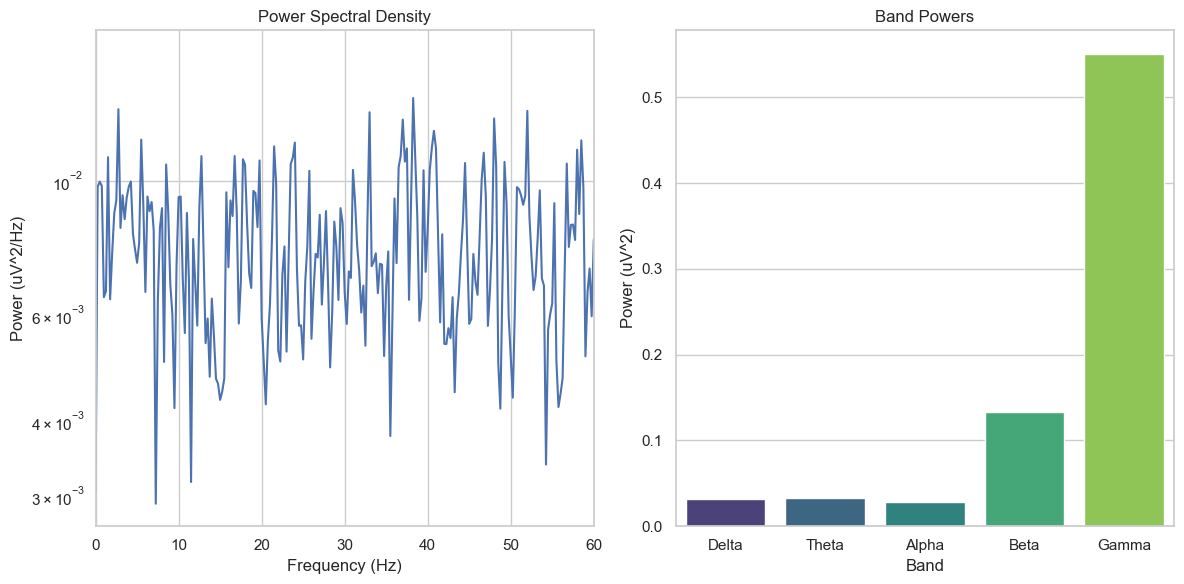

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import welch

# Load your dataframe (assuming you already have it in `df`)
# If it's a CSV or similar:
# df = pd.read_csv('your_data.csv')

# 1. Filter EEG channels
eeg_df = merged_df[merged_df['type'] == 'EEG']

# 2. Settings
fs = eeg_df['sampling_frequency'].iloc[0]  # Sampling frequency (Hz)
nperseg = 1024  # Length of each Welch segment

# Frequency bands (Hz)
bands = {
    'Delta': (0.5, 4),
    'Theta': (4, 8),
    'Alpha': (8, 12),
    'Beta': (12, 30),
    'Gamma': (30, 100)
}

# 3. Mock signal for demonstration (replace with your actual signal later!)
#    Here, just random noise, you should replace it with real EEG data array!
signal = np.random.randn(int(30 * fs))  # 30 seconds of fake EEG

# 4. Compute Power Spectral Density (PSD)
frequencies, psd = welch(signal, fs, nperseg=nperseg)

# 5. Calculate band powers
band_powers = {}
for band, (low_freq, high_freq) in bands.items():
    idx_band = np.logical_and(frequencies >= low_freq, frequencies <= high_freq)
    band_power = np.trapz(psd[idx_band], frequencies[idx_band])
    band_powers[band] = band_power

# 6. Plotting
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))

# PSD plot
plt.subplot(1, 2, 1)
plt.semilogy(frequencies, psd)
plt.title('Power Spectral Density')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (uV^2/Hz)')
plt.xlim(0, 60)  # Show up to 60 Hz
plt.grid(True)

# Bandpower barplot
plt.subplot(1, 2, 2)
sns.barplot(x=list(band_powers.keys()), y=list(band_powers.values()), palette='viridis')
plt.title('Band Powers')
plt.ylabel('Power (uV^2)')
plt.xlabel('Band')

plt.tight_layout()
plt.show()


In [14]:
print(eeg_df.columns)

Index(['name', 'type', 'units', 'sampling_frequency', 'onset', 'duration',
       'begsample', 'endsample', 'offset', 'real_frequency'],
      dtype='object')


In [15]:
import pandas as pd
import numpy as np
from scipy.signal import welch
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load your EEG Data (Replace this with your actual data)
# df = pd.read_csv("your_eeg_data.csv")  # Or use your DataFrame

# Filter EEG channels only
eeg_df = merged_df[merged_df['type'] == 'EEG']
fs = eeg_df['sampling_frequency'].iloc[0]  # Sampling frequency

# Define frequency bands (Delta, Theta, Alpha, Beta, Gamma)
bands = {
    'Delta': (0.5, 4),
    'Theta': (4, 8),
    'Alpha': (8, 12),
    'Beta': (12, 30),
    'Gamma': (30, 100)
}

# Function to extract power for each frequency band
def extract_band_power(signal, fs):
    frequencies, psd = welch(signal, fs, nperseg=1024)
    band_powers = []
    for band, (low, high) in bands.items():
        idx = (frequencies >= low) & (frequencies <= high)
        band_powers.append(np.trapz(psd[idx], frequencies[idx]))  # Integrate PSD over the band
    return np.array(band_powers)

# Assuming each row is one EEG recording
features = []
labels = []  # Migraine = 1, No migraine = 0

# Extract features from EEG data
for i, row in eeg_df.iterrows():
    eeg_signal = np.random.randn(int(30 * fs))  # Replace this with real EEG signal (e.g., row['eeg_signal'])
    band_power = extract_band_power(eeg_signal, fs)
    features.append(band_power)
    labels.append(np.random.randint(0, 2))  # You need to have this column in your data 
    # אני זנ=מנית שמתי פה משהו רנדומלי, אבל בגדול כאשר יהיה לך את הדאטה, את תצטרכי לשים פה את הנתונים עצמם. אשאיר לך שבלונה
    # labels.append(row['migraine_label']) #פה את תשימי את הדאטה עצמה כאשר יהיה

# Convert to numpy arrays
X = np.array(features)
y = np.array(labels)

# Step 1: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Create and train the SVM model
model = SVC(kernel='linear')  # You can change the kernel to 'rbf' for non-linear classification
model.fit(X_train, y_train)

# Step 3: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Step 4: Plot accuracy and loss over epochs (This part is not applicable for SVM, so we skip it)
# Instead, we can plot the confusion matrix or the predictions

# Step 5: Real-time prediction function (same as before)
def predict_migraine(eeg_signal, fs):
    # Extract features from EEG signal
    band_power = extract_band_power(eeg_signal, fs).reshape(1, -1)
    
    # Predict if migraine is likely
    prediction = model.predict(band_power)
    return "Warning: Possible migraine incoming!" if prediction > 0.5 else "No migraine detected."

# Example: Run live on new EEG data (replace with real EEG signal)
new_eeg_signal = np.random.randn(int(30 * fs))  # Replace with real EEG data
print(predict_migraine(new_eeg_signal,fs))

Test Accuracy: 25.00%


C:\Users\jacky\AppData\Local\Temp\ipykernel_67268\2088395463.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  band_powers.append(np.trapz(psd[idx], frequencies[idx]))  # Integrate PSD over the band
C:\Users\jacky\AppData\Local\Temp\ipykernel_67268\2088395463.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  band_powers.append(np.trapz(psd[idx], frequencies[idx]))  # Integrate PSD over the band


In [16]:
import pandas as pd
import numpy as np
from scipy.signal import welch
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Filter EEG channels only
eeg_df = merged_df[merged_df['type'] == 'EEG']
fs = eeg_df['sampling_frequency'].iloc[0]  # Sampling frequency

# Define frequency bands
bands = {
    'Delta': (0.5, 4),
    'Theta': (4, 8),
    'Alpha': (8, 12),
    'Beta': (12, 30),
    'Gamma': (30, 100)
}

def extract_band_power(signal, fs):
    frequencies, psd = welch(signal, fs, nperseg=1024)
    band_powers = []
    for band, (low, high) in bands.items():
        idx = (frequencies >= low) & (frequencies <= high)
        band_powers.append(np.trapz(psd[idx], frequencies[idx]))
    return np.array(band_powers)

features = []
labels = []  # 0=no migraine, 1=approaching migraine, 2=urgent

for i, row in eeg_df.iterrows():
    eeg_signal = np.random.randn(int(30 * fs))  # Replace with real EEG signal
    band_power = extract_band_power(eeg_signal, fs)
    features.append(band_power)
    labels.append(np.random.randint(0, 3))  # Randomly assign 0/1/2 for demo
    # labels.append(row['migraine_label'])  # Replace with real label

X = np.array(features)
y = np.array(labels)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multi-class SVM
model = SVC(kernel='linear', decision_function_shape='ovr')  # One-vs-rest for multi-class
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Updated prediction function
def predict_migraine(eeg_signal, fs):
    band_power = extract_band_power(eeg_signal, fs).reshape(1, -1)
    prediction = model.predict(band_power)[0]
    
    if prediction == 0:
        return "No migraine detected."
    elif prediction == 1:
        return "Warning: Possible migraine incoming!"
    elif prediction == 2:
        return "URGENT: Take medication and contact your doctor!"
    else:
        return "Unknown prediction."

# Example
new_eeg_signal = np.random.randn(int(30 * fs))  # Replace with real EEG
print(predict_migraine(new_eeg_signal, fs))


C:\Users\jacky\AppData\Local\Temp\ipykernel_67268\690913113.py:27: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  band_powers.append(np.trapz(psd[idx], frequencies[idx]))


Test Accuracy: 25.00%


C:\Users\jacky\AppData\Local\Temp\ipykernel_67268\690913113.py:27: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  band_powers.append(np.trapz(psd[idx], frequencies[idx]))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_fft(eeg_signal, fs):
    """
    eeg_signal: וקטור של אות EEG (numpy array)
    fs: תדר הדגימה (sampling frequency)
    """
    N = len(eeg_signal)  # מספר הדגימות
    fft_vals = np.fft.rfft(eeg_signal)  # FFT חד-צדדי
    fft_freqs = np.fft.rfftfreq(N, 1/fs)  # התדרים המתאימים
    
    # הספק (Power Spectrum)
    power = np.abs(fft_vals)**2 / N
    
    # ציור הגרף
    plt.figure(figsize=(10, 5))
    plt.plot(fft_freqs, power)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power")
    plt.title("EEG Power Spectrum (FFT)")
    plt.xlim(0, 60)  # להגביל לתדרים רלוונטיים
    plt.grid(True)
    plt.show()
    
    return fft_freqs, power  


# eeg_signal = ... (פה תכניסי את האות )
# analyze_fft(eeg_signal, fs)
